# Wrangle

We will start with mall_customers database.

- acquire, verify our acquire module is working
- summarize data
- plot histograms and boxplots
- na's
- outliers
- astype()
- pd.cut()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

In [2]:
df = acquire.get_mall_data()

# Sumarize data

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

Takeaways
- encode gender
- drop customer id
- define target variable: spending score

In [6]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [7]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


** Takeaways **
1. Not sure how annual income is computed, or what unit is in
2. I don't know what spending score means, I assuming higher spending score means more likely to spend, better to market to?

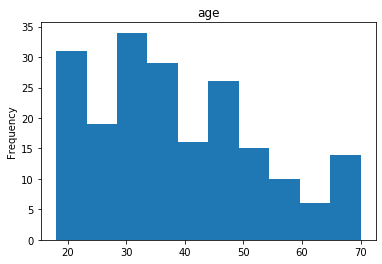

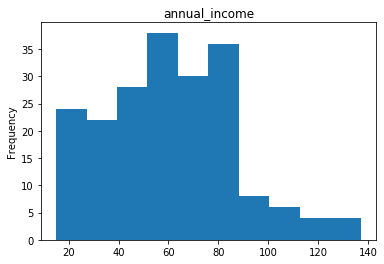

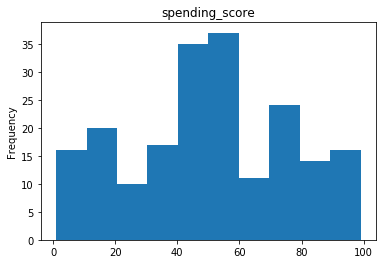

In [8]:
for col in ['age', 'annual_income', 'spending_score']:
    df[col].plot.hist(title=col)
    plt.show()

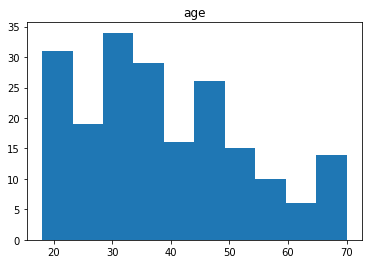

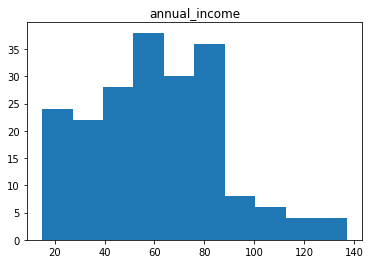

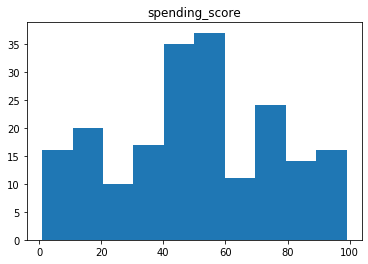

In [19]:
# Can also use this code to plot
for col in ['age', 'annual_income', 'spending_score']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()


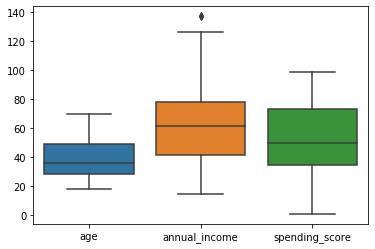

In [20]:
sns.boxplot(data=df[['age','annual_income', 'spending_score']])

In [21]:
#.isna() shows bools of each column of data. .sum gives us the counts
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

**cutting / binning** lets us turn continuous variables into categorical one by putting the numeric into bins

- `pd.cut` creates bins of equal width
- `pd.qcut` creates bins with the same number of observations in each

In both cases the range of the bins is determined from the data(but we could specify it ourselves)

This can be helpful for initial exploration, interpretation, and visualization.

In [22]:
# Cutting bins into 4 bins, can see how many fall in each bin
pd.cut(df.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [25]:
# Equally cuts the bins
pd.qcut(df.age,4).value_counts().sort_index()

(17.999, 28.75]    50
(28.75, 36.0]      54
(36.0, 49.0]       51
(49.0, 70.0]       45
Name: age, dtype: int64

In [24]:
# Can manually enter the bins
pd.cut(df.age, bins=[0,30,50,100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [26]:
# Encoding gender and making it into an interger
df['is_female'] = (df.gender == 'Female').astype('int')
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [27]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df,test_size =.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)

print('train', train.shape)
print('test', test.shape)
print('validate', validate.shape)
# look into when to stratify
# stratify parameter will preserve the proportion of target as in original dataset, in the train and test 
# datasets as well.

train (144, 6)
test (30, 6)
validate (26, 6)


# This is the data needed to modify my DF

In [28]:

df = acquire.get_mall_data()

def prep_mall_data(df):
    '''
    Takes the acquired mall data, does data prep, and return
    train, test, validate data splits.
    '''
    df['is_female'] = (df.gender == 'Female').astype('int')
    train_and_validate, test = train_test_split(df,test_size =.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train, test, validate

In [29]:
prep_mall_data(df)

(     customer_id  gender  age  annual_income  spending_score  is_female
 107          108    Male   54             63              46          0
 40            41  Female   65             38              35          1
 167          168  Female   33             86              95          1
 22            23  Female   46             25               5          1
 187          188    Male   28            101              68          0
 ..           ...     ...  ...            ...             ...        ...
 100          101  Female   23             62              41          1
 136          137  Female   44             73               7          1
 16            17  Female   35             21              35          1
 131          132    Male   39             71              75          0
 43            44  Female   31             39              61          1
 
 [144 rows x 6 columns],
      customer_id  gender  age  annual_income  spending_score  is_female
 50            51  Femal

# Regression exercises with the Telco data

### Throughout the exercises for Regression in Python lessons, you will use the following example scenario: As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

The first step will be to acquire and prep the data. Do your work for this exercise in a file named wrangle.py.

### Going to clean up my data just a bit. Need to create payment type dummies

In [61]:
# Make sure these imports are here in order to work with acquire and prepare files
import acquire
import prepare
df = acquire.get_telco_data()

In [62]:
df.shape

(7043, 27)

In [63]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [64]:
#payment_dum = pd.get_dummies(df.payment_type)

#df = pd.concat([df, payment_dum], axis = 1)
#df = df.rename(columns = {'Electronic check': 'electronic_check', 'Mailed check': 'mailed_check', 'Bank transfer (automatic)': 'bank_transfer_auto', 'Credit card (automatic)': 'credit_card_auto'})
#df = df.drop('payment_type', axis = 1)

In [65]:
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
gender,Male,Female,Female,Male,Female
senior_citizen,0,0,1,1,0
partner,No,No,No,No,Yes
dependents,No,Yes,No,No,Yes
tenure,9,9,7,1,1
phone_service,Yes,Yes,Yes,No,No
multiple_lines,Yes,No,No,No phone service,No phone service
internet_service_type_id,1,1,1,1,1
online_security,No,No,Yes,No,Yes


In [66]:
#import acquire
#import prepare
df = prepare.prepare_telco_all(df)
df.head().T

,0,1,2,3,4
customer_id,0003-MKNFE,0013-MHZWF,0015-UOCOJ,0023-HGHWL,0032-PGELS
male,1,0,0,1,0
senior_citizen,0,0,1,1,0
partners,0,0,0,0,1
dependents,0,1,0,0,1
tenure,9,9,7,1,1
phone_service,1,1,1,0,0
multiple_lines,1,0,0,0,0
internet_service_type,1,1,1,1,1
online_security,0,0,1,0,1


In [67]:
# Shows all function in the prepare file
dir(prepare)

['SimpleImputer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'get_iris_data',
 'get_titanic_data',
 'impute_age',
 'iris_split',
 'np',
 'pd',
 'prep_iris',
 'prep_mall_data',
 'prep_titanic',
 'prepare_telco',
 'prepare_telco_all',
 'titanic_split',
 'train_test_split',
 'warnings',
 'wrangle_telco']

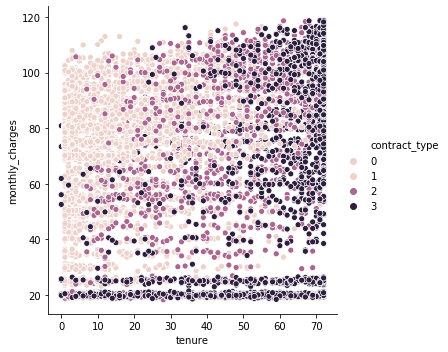

In [69]:
sns.relplot(x='tenure', y='monthly_charges', hue='contract_type', data=df)

### 1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [53]:
df = df[df['two_year'] == 1]
df = df[['customer_id', 'monthly_charges', 'tenure', 'total_charges']]
df.head()

,customer_id,monthly_charges,tenure,total_charges
1793,0016-QLJIS,90.45,65,5957.90
1794,0017-DINOC,45.20,54,2460.55
1795,0019-GFNTW,45.05,56,2560.10
1796,0056-EPFBG,39.40,20,825.40
1797,0078-XZMHT,85.15,72,6316.20


### 2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [54]:
df.isnull().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [55]:
# For loop to see all null values of new df
for x in df.columns:
    print(x)
    print(df[x].isnull().sum())

customer_id
0
monthly_charges
0
tenure
0
total_charges
0


In [56]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 1793 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 66.2+ KB


In [59]:
df.corr()

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.410301,0.941804
tenure,0.410301,1.000000,0.635563
total_charges,0.941804,0.635563,1.000000


In [ ]:
# Visual of data. Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object.
# This enumerate object can then be used directly in for loops or be converted into a list of tuples using 
# list() method.

plt.figure(figsize= (20,5))
for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=6)

Takeaways from visualizations:
    - Majority of monthly charges is in 20-40 range
    - Bulk of the tenure is in the end 60-70 month range.
    - Have a large group of people paying less than $2000 for total charges

## Cutting/bins
- bins = (defines bin)
- pd.cut creates bins of equal width
- pd.qcut creates bins with same number of observations in each

In [ ]:
# Left side of bin not included. Right side of the bin is inclusive
# bins of equal width. Can see how many customers fall in each category.

pd.cut(df.monthly_charges, bins = 20).value_counts()

In [ ]:
# Equally distributed bins
pd.qcut(df.monthly_charges, 8).value_counts().sort_index()

In [ ]:
!git status

In [ ]:
!git add -A

In [ ]:
#!git commit -m "Update for exercise"

In [ ]:
#!git push